<a href="https://colab.research.google.com/github/Debanjan-C/WANG-690-FALL-2020/blob/master/Assignment-09/Assignment_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data 690 Homework 9 
- Option number 2 - EDA and Data Visualization

## Background and Details

- The main purpose of this assignment is to use **Exploratory Data Analysis** and **Data Visualization** to understand individuals credit amounts and what factors could possible play a role in the credit amount of and individuals in banks. 
- I wanted to look into this topic as I was always wondering how credit amounts may be determined and what are the **common factors** that are used in order to determine it. 
- We will be using **EDA** to understand specific sections in the data like age groups, hosuing type, which folks have a *higher credit amount* and what is their *savings and checkings account amounts like* and more.
  - Then we use **data visualization** to show the results and help us understand the patters or results of the datas in an effective way.

## Source



The **dataset** is retrieved from Kaggle : https://www.kaggle.com/uciml/german-credit
- It contains informations about individuals in **Germany** who has a specific credit amount in a bank. This dataseet would be used to evaluate if an individuals credit would be considered good or bad. 
- The data looks into an individuals *age, gender, housing status, their job status, the savings amount they have in bank, their checkings account amount, savings account amount, the credit amount they took and the duration of how long they have had their account*, and the purpose of their account.


### Import potential libraries
 - **matplotlib**- We use if for data visualization
 - **pandas** - We use this for reading data and generating dataframes
 - **seaborn** - Another data visualization used for more Data Visualizations

In [ ]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

### Loading our dataset

In [ ]:
df = pd.read_csv('german_credit_data.csv', index_col=0)

### Checking the number of rows and columns
Our dataset contains 1000 rows and 9 columns.

In [ ]:
df.shape

(1000, 9)

### Taking a look at our columns.
- Our columns are the individuals age, gender, the job status, hosuing status, savings account, savings and checking account in the bank, credit amount, the duration of their accounts and the purpose of their credit like the items they have purchased which may affect credit amount. 



In [ ]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

### Summary Statistics
- This will show us the *count, average, standard devation and all statistical details* of the numeric columns. 

In [ ]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


### Checking for Null values and updating those.

- Checking for null valies and verifying if we have any. We have null values in the Savings or checking account column.

In [ ]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

### First ten in the dataset
- When we take a look at the top 10 datas, we can see that we have nulls in savings and checkings account columns. 
- This could indicate that the individual may not have the respective account they have a null for. Some folks only get savings account and some only create a checkings accounbt.

In [ ]:
df.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
5,35,male,1,free,NaN,NaN,9055,36,education
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
7,35,male,3,rent,little,moderate,6948,36,car
8,61,male,1,own,rich,NaN,3059,12,radio/TV
9,28,male,3,own,little,moderate,5234,30,car


### Replacing all nulls
- Therefore, those who have a null value in the respective savings or checkings account section, should have a secion mentioned no account. 
- I replaced all nulls with no accounts. Dropping the nulls would not make sense as not having one of the accounts **could possibly play a role on credit.**

In [ ]:
df = df.fillna("no acct")

### Double checking for nulls after we make updates to the null values.

In [ ]:
df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

## Data Heads and Tail for our updated datasets

- Top 5 datas in our overall dataset.

In [ ]:
df.head(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,no acct,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,no acct,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


- Bottom 5 datas in our overall dataset.

In [ ]:
df.tail(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
995,31,female,1,own,little,no acct,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,no acct,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV
999,27,male,2,own,moderate,moderate,4576,45,car


## Further EDA and Visualizations
- This is the step where we will explore each individuals column values and then see how it affects the **final credit amount for each individual**.


### Checkings Account and the Credit Amount
- It seems that most of the individuals do not have a **checkings account** and the least amount of individuals are considered **rich** in terms of their checking account amount.

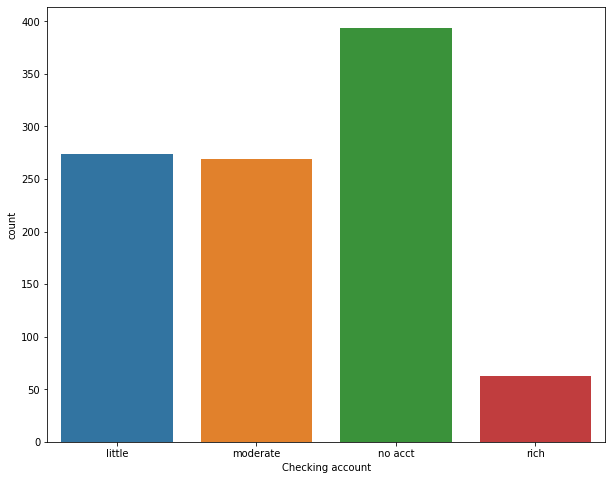

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(x="Checking account", data=df)

- We are aggregarting the data based on each of the sections in the checkings account with their repsective mean.


In [ ]:
checking_df = df[["Checking account","Credit amount"]].groupby('Checking account').agg(
    Mean_credit=pd.NamedAgg("Credit amount", "mean") 
)
checking_df = checking_df.reset_index()
checking_df.head()

,Checking account,Mean_credit
0,little,3175.218978
1,moderate,3827.561338
2,no acct,3133.101523
3,rich,2177.650794


- Below we made a bar plot to show the relationship for each of the sections in the checkings account and we can see that those who are considered **rich in terms of checkings account** have a lowest average credit amount and the lowest quantity may be playing a role with this.
- Earlier, we had noticed that most individuals have **no checkings account**, but it seems their average credit amount is not the highest, but those who have a **moderate checkings account** have the highest average credit amount.

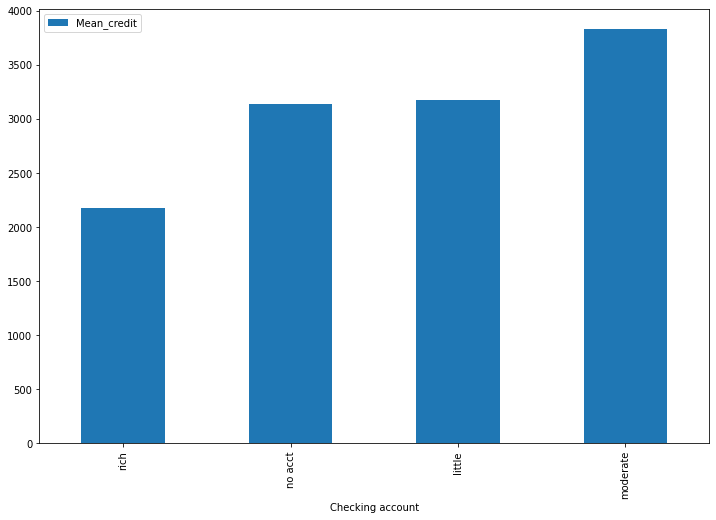

In [ ]:
checking_df.sort_values(by="Mean_credit").plot.bar(
    x="Checking account", 
    y="Mean_credit",
    figsize=(12,8)
)

### Savings Account and the Credit Amount
- It seems that most of the individuals are considered to have little in their **savings account** and the least amount of individuals are considered **rich** in terms of their checking account amount. 
- **We do not have as many "No accounts" in savings as checkings account as most folks seem to want to keep money in the savings account.**

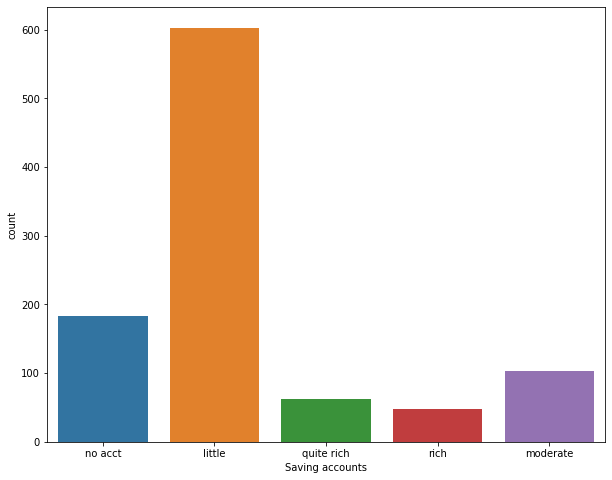

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(x="Saving accounts", data=df)

- We are aggregating the data based on each of the sections in the savings account with their repsective mean.


In [ ]:
savings_df = df[["Saving accounts","Credit amount"]].groupby('Saving accounts').agg(
    Mean_credit=pd.NamedAgg("Credit amount", "mean") 
)
savings_df = savings_df.reset_index()
savings_df.head()

,Saving accounts,Mean_credit
0,little,3187.832504
1,moderate,3384.038835
2,no acct,3906.409836
3,quite rich,2572.111111
4,rich,2573.395833


- Below we made a bar plot to show the relationship for each of the sections in the savings account and we can see that those who are considered **quite rich in terms of checkings account** have a lowest average credit amount and the lower quanitity of individuals in that category may be playing a role.
- Those folks who do not have a savings account seem to have the **highest average credit amount**. 

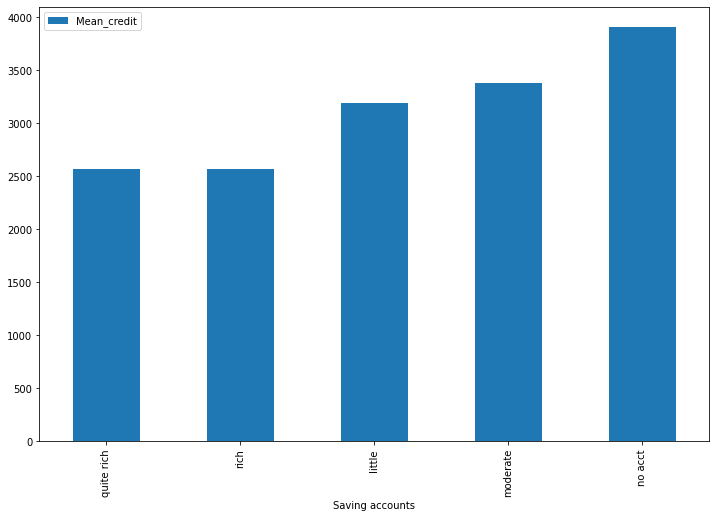

In [ ]:
savings_df.sort_values(by="Mean_credit").plot.bar(
    x="Saving accounts", 
    y="Mean_credit",
    figsize=(12,8)
)

### Age and Credit Amount Relation
- We are taking a look at the ages of all the individuals in the dataset and as we can see, most of the individuals are within the **20's to 40's range of the age group**.

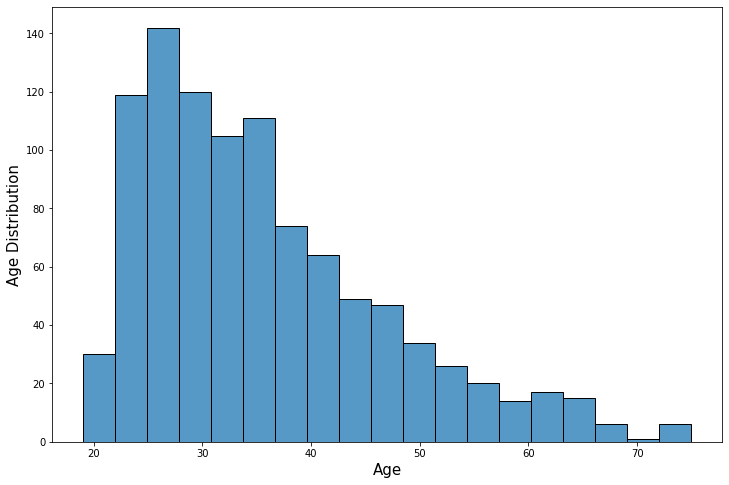

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.histplot(df["Age"])

ax.set_xlabel("Age", fontsize=15)
ax.set_ylabel("Age Distribution", fontsize=15)

plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

- Age correlation with the credit amounts.
  - Below, I have developed a scatterplot to show that the majority of the users are within the 20s to 40s age group and many of them have a **relatively lower credit amount** from 0 to 5,000.

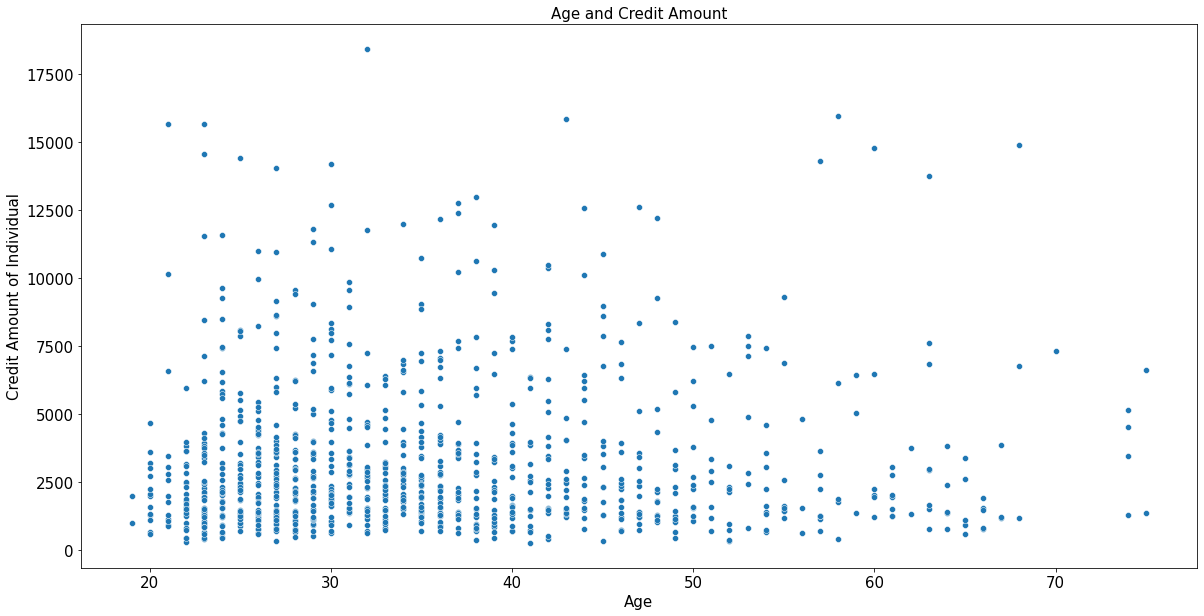

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.scatterplot(data=df, x="Age", y="Credit amount",)
ax.set_title("Age and Credit Amount", fontsize=15)
ax.set_xlabel("Age", fontsize=15)
ax.set_ylabel("Credit Amount of Individual", fontsize=15)

plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 


- Age correlation with the credit amounts and gender.
  - Below, I have developed a scatterplot to show that the majority of the users are male and in some instances male have a higher credit amount than female and in other cases female seem to have a higher credit amount. However, it seems that a **female has the highest credit amount** and is between the ages od 30-40 range and her credit amount is above 17,500. 

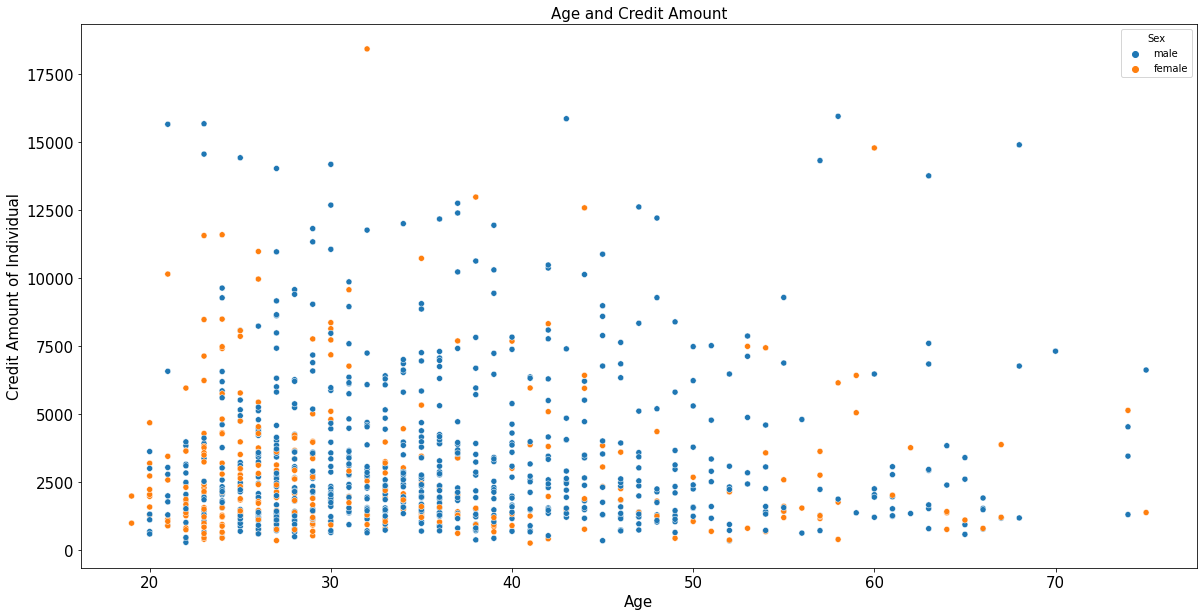

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.scatterplot(data=df, x="Age", y="Credit amount", hue = "Sex")
ax.set_title("Age and Credit Amount", fontsize=15)
ax.set_xlabel("Age", fontsize=15)
ax.set_ylabel("Credit Amount of Individual", fontsize=15)

plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 


### Duration of Account and the Credit Amount of individual
- I also wanted to evaluate the **relationship between the duration of the acount of an individual and the credit amount**. As I can see, those who have had their accounts for a longer time seem to be using a higher credit amount. 
- The duration is measured in months.
- Therefore, I feel the **duration of the account plays a role**. 

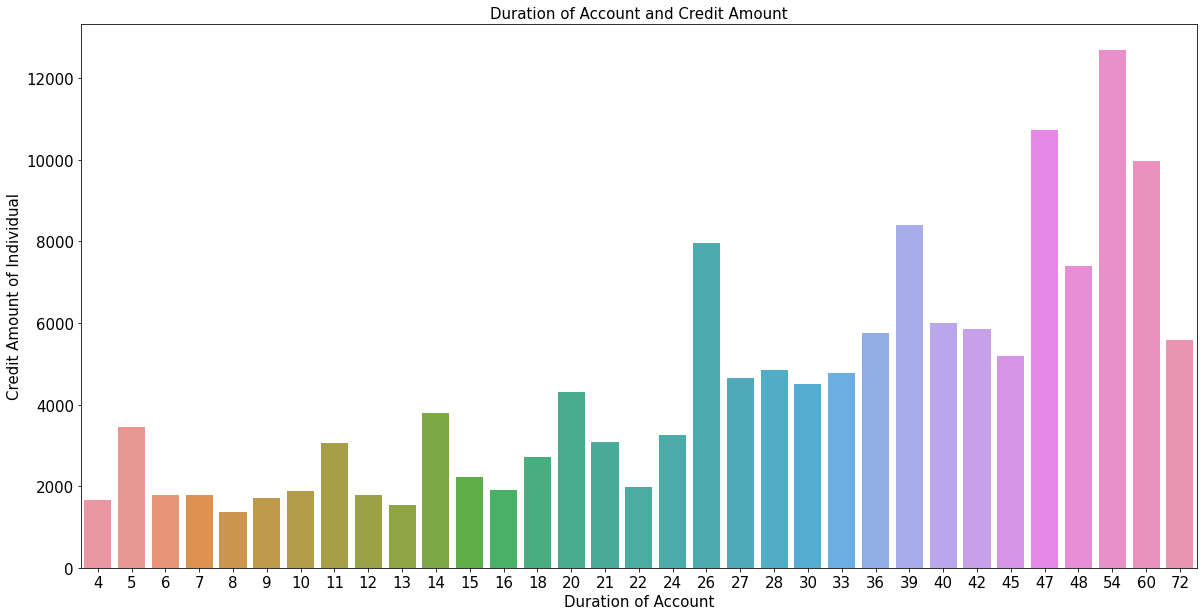

In [ ]:


fig, ax = plt.subplots(figsize=(20, 10))

sns.barplot(data=df, x="Duration", y="Credit amount", ci=None)
ax.set_title("Duration of Account and Credit Amount", fontsize=15)
ax.set_xlabel("Duration of Account", fontsize=15)
ax.set_ylabel("Credit Amount of Individual", fontsize=15)

plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 


### Housing status and Credit Amount
- It seems an individuals **housing status** seems to be a factor that determines the **credit amount** they may be using. 
- In all cases, it seems **male seem to have a higher credit amount** regardless of the housing status.
- However, the lowest amount for men who have **free housing** seem to be less then the amount for women. Therefore, I assume **free hosuing** could also play a role. 
- The folks who may have free housing  may have benefits from the government or maybe living parents.

Text(0, 0.5, 'Credit amount')

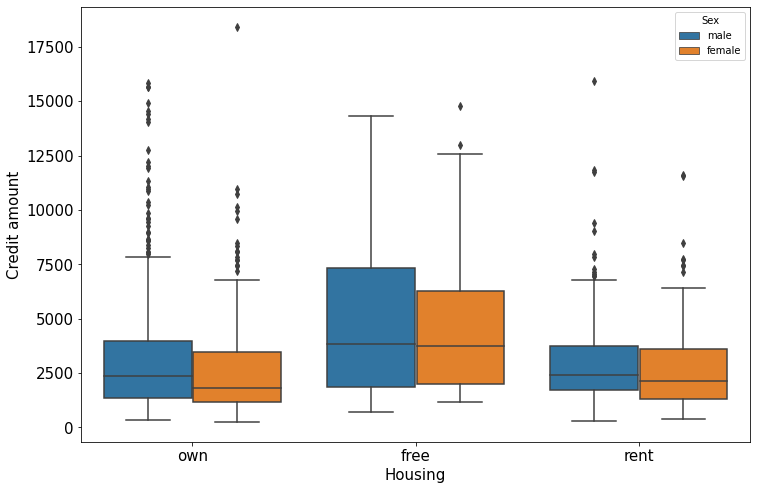

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x="Housing", y="Credit amount", hue="Sex", data=df)
ax.set_xlabel("Housing", fontsize=15)
ax.set_ylabel("Credit amount", fontsize=15)

## Other Observations and Conclusion
- As we can see in the overall observations, the credit amount for each individual correlates with many factors like their **savings account, checkings account, age, residence status, etc**. 
- The individuals who may have had their account for a longer duration seem to have a higher credit amount than those who have had their accounts for a shorter period of time.
- If we look at the **ages of individuals** in the dataset, we can see that those within the ages of 20-40 are in a higher quantity than the others.
- I also learned that there could be individuals who would prefer to have a **savings account** but not a **checkings account** and that may because many want to save money for long run and checking account means you are spending immediately. That is why those who have a **moderate amount** in the checkings account have the highest credit amount and those who do not have **anything in the savings account** seem to have the highest credit amount as well.
- When we looked at the housing status, I realized that the males have a higher credit amount than female when they have their **own house** or **rented a house**.
  - However, when we look at it in terms of those who have **free hosuing** then the lower limit is lower for men than women and the higher limit is higher for men. So, that was a little different from the other two housing status.